<a href="https://colab.research.google.com/github/ferreiraluisa/faculdade/blob/main/Jonas_Moreira_102010_Lademir_Junior_102018_Lu%C3%ADsa_Ferreira_102026_trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar Verilog Plugin

Executar o comando abaixo.

In [ ]:
!pip install git+git://github.com/canesche/nvcc4jupyter.git
!git clone https://github.com/canesche/nvcc4jupyter
%load_ext nvcc_plugin

  Cloning git://github.com/canesche/nvcc4jupyter.git to /tmp/pip-req-build-vt4jv4ju
  Running command git clone -q git://github.com/canesche/nvcc4jupyter.git /tmp/pip-req-build-vt4jv4ju
  Created wheel for ColabPlugin: filename=ColabPlugin-0.0.3-cp36-none-any.whl size=14291 sha256=0e76cc58e088d3dac8f7120a00e4ce4c98595247351f345d44fe288fcd6ae3fc
  Stored in directory: /tmp/pip-ephem-wheel-cache-7nxnrkdn/wheels/87/ae/09/21c6e192181a0472e20ddd1d5212e2cbb113f00ebe14330d0d
Successfully built ColabPlugin
Cloning into 'nvcc4jupyter'...
remote: Enumerating objects: 345, done.
remote: Counting objects: 100% (345/345), done.
remote: Compressing objects: 100% (224/224), done.
remote: Total 785 (delta 239), reused 226 (delta 121), pack-reused 440
Receiving objects: 100% (785/785), 27.71 MiB | 11.60 MiB/s, done.
Resolving deltas: 100% (448/448), done.
created output directory at /content/src
Out bin /content/result.out


# Parte I -  Priority Encoder com 16 entradas

Um prioridade encoder de 16 entradas terá $2^{16}=65536$ combinações de entradas. Ou seja, uma tabela verdade com 65536 linhas....

Para simplificar o projeto iremos decompor em dois estágios. O primeiro estágio tem 4 grupos com um encoder 4:2 em cada grupo. Iremos identificar quem foi acionado dentro de cada grupo: $0,\ldots,3$ no grupo 0, $4,\ldots,7$ no grupo 1, $8,\ldots,11$ no grupo 2 e $12,\ldots,15$ no grupo 3. O bit de válido de cada grupo é enviado para o segundo estágio para descobrir qual é o número do grupo. Finalmente, o número do grupo irá ativar o multiplexador que irá enviar para saída o elemento ativo dentro do grupo. Juntando o número do grupo (parte mais significativa) com a elemento interno (parte menos significativa), teremos o número da entrada acionada. A prioridade é dada ao valor mais alto, no caso de duas entradas serem acionadas.  

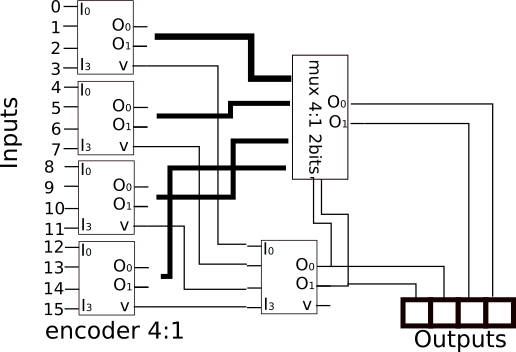

In [ ]:
%%verilog
module encoder4_1(
		input  [3:0]I, // definir as entradas
    output [1:0]O,  // definir as saidas
		output v
    );
// COMPLETAR aqui
assign O[0] = (~I[2] & I[1]) | (I[3]);
assign O[1] = (I[2]) | (I[3]);
assign v = I[3] | I[2] | I[1] | I[0];
endmodule

module mux41(i3,i2,i1,i0,s1,s0,y);
input i3,i2,i1,i0,s1,s0;
output y;
// COMPLETAR AQUI....
wire a,b;
assign y = (s1)?a:b;
assign a = (s0)?i3:i2;
assign b = (s0)?i1:i0;

endmodule

module mux41_2bits(input [1:0]I3, input [1:0]I2,input [1:0]I1,input [1:0]I0,input [1:0]s, output [1:0] O);
// COMPLETAR AQUI ....
mux41 a0(I3[0],I2[0],I1[0],I0[0],s[1],s[0],O[0]);
mux41 a1(I3[1],I2[1],I1[1],I0[1],s[1],s[0],O[1]);
endmodule

module encoder16(I,O);
input [15:0] I;
output [3:0] O;
// COMPLETAR AQUI ....
wire [4:0]v;
wire [1:0]o30,o74,o118,o1512;
encoder4_1 m30(I[3:0],o30,v[0]);
encoder4_1 m47(I[7:4],o74,v[1]);
encoder4_1 m118(I[11:8],o118,v[2]);
encoder4_1 m1512(I[15:12],o1512,v[3]);
encoder4_1 v1(v[3:0],O[3:2],v[4]);
mux41_2bits a(o1512,o118,o74,o30,O[3:2],O[1:0]);

endmodule

module logic_testbench();  // Esta parte do codigo é para gerar os 16 valores
reg [15:0] counter;
wire [3:0] s;
integer k;
	encoder16 t(counter,s);
	initial begin
		$display("x5432109876543210 |  Out");
		$monitor(" %16b |      %d", counter,s);
		counter = 0;
		for (k=1; k<65536; k=k<<1)
     #1 counter = k;
		$finish;
	end
endmodule



x5432109876543210 |  Out
 0000000000000000 |       0
 0000000000000001 |       0
 0000000000000010 |       1
 0000000000000100 |       2
 0000000000001000 |       3
 0000000000010000 |       4
 0000000000100000 |       5
 0000000001000000 |       6
 0000000010000000 |       7
 0000000100000000 |       8
 0000001000000000 |       9
 0000010000000000 |      10
 0000100000000000 |      11
 0001000000000000 |      12
 0010000000000000 |      13
 0100000000000000 |      14
 1000000000000000 |      15



# Parte II - Encoder prioridade para menos significativo

Complete a tabela abaixo para um encoder de prioridade que seleciona a menor entrada quanto duas ou mais estao ativas. 

$I_3$ |$I_2$ |$I_1$ |$I_0$ | $O_1O_0$ | v
---|---|---|---|---|---
0 | 0 | 0 | 0 | xx | 0
0 | 0 | 0 | 1 | 0 | 1
0 | 0 | 1 | 0 | 1 | 1
0 | 0 | 1 | 1 | 0 | 1
0 | 1 | 0 | 0 | 2 | 1
0 | 1 | 0 | 1 | 0 | 1
0 | 1 | 1 | 0 | 1 | 1
0 | 1 | 1 | 1 | 0 | 1
1 | 0 | 0 | 0 | 3 | 1
1 | 0 | 0 | 1 | 0 | 1
1 | 0 | 1 | 0 | 1 | 1
1 | 0 | 1 | 1 | 0 | 1
1 | 1 | 0 | 0 | 2 | 1
1 | 1 | 0 | 1 | 0 | 1
1 | 1 | 1 | 0 | 1 | 1
1 | 1 | 1 | 1 | 0 | 1

Use as ferramentas de mapa de karnaugh para gerar as funçoes $O_1,O_0,v$.









In [ ]:
%%verilog 
module encoderLOW(
		input  [3:0]x, // definir as entradas
    output [1:0] y,  // definir as saidas
  output v
    );
// COMPLETAR AQUI ....
assign y[0] = (x[1] & ~x[0]) | (x[3] & ~x[2] & ~x[0]);
assign y[1] = (x[2] & ~x[1] & ~x[0]) | (x[3] & ~x[1] & ~x[0]);
 assign v = (x[0]) | (x[1]) | (x[2]) | (x[3]);
endmodule


module logic_testbench();  // Esta parte do codigo é para gerar os 16 valores
reg [3:0] counter;
wire [1:0] s;
wire v;
integer k;
  encoderLOW S(counter,s,v);
	initial begin
		$display("x3210 | Out  v ");
		$monitor(" %4b |   %d %b", counter,s, v);
		counter = 0;
		for (k=1; k<16; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

x3210 | Out  v 
 0000 |   0 0
 0001 |   0 1
 0010 |   1 1
 0011 |   0 1
 0100 |   2 1
 0101 |   0 1
 0110 |   1 1
 0111 |   0 1
 1000 |   3 1
 1001 |   0 1
 1010 |   1 1
 1011 |   0 1
 1100 |   2 1
 1101 |   0 1
 1110 |   1 1
 1111 |   0 1



# Parte III Encoder 16 com baixa prioridade

Refaça o encoder16 agora usando o modulo de baixa prioridade que voce fez na parte II.

In [ ]:
%%verilog
module encoderLOW(
		input  [3:0]x, // definir as entradas
    output [1:0] y,  // definir as saidas
  output v
    );
// COMPLETAR AQUI ....
assign y[0] = (x[1] & ~x[0]) | (x[3] & ~x[2] & ~x[0]);
assign y[1] = (x[2] & ~x[1] & ~x[0]) | (x[3] & ~x[1] & ~x[0]);
 assign v = (x[0]) | (x[1]) | (x[2]) | (x[3]);
endmodule

module mux41(i3,i2,i1,i0,s1,s0,y);
input i3,i2,i1,i0,s1,s0;
output y;
// COMPLETAR AQUI....
wire a,b;
assign y = (s1)?a:b;
assign a = (s0)?i3:i2;
assign b = (s0)?i1:i0;

endmodule

module mux41_2bits(input [1:0]I3, input [1:0]I2,input [1:0]I1,input [1:0]I0,input [1:0]s, output [1:0] O);
// COMPLETAR AQUI ....
mux41 a0(I3[0],I2[0],I1[0],I0[0],s[1],s[0],O[0]);
mux41 a1(I3[1],I2[1],I1[1],I0[1],s[1],s[0],O[1]);
endmodule

module encoder16(I,O);
input [15:0] I;
output [3:0] O;
// COMPLETAR AQUI ....
wire [4:0]v;
wire [1:0]o30,o74,o118,o1512;
encoderLOW m30(I[3:0],o30,v[0]);
encoderLOW m47(I[7:4],o74,v[1]);
encoderLOW m118(I[11:8],o118,v[2]);
encoderLOW m1512(I[15:12],o1512,v[3]);
encoderLOW v1(v[3:0],O[3:2],v[4]);
mux41_2bits a(o1512,o118,o74,o30,O[3:2],O[1:0]);

endmodule


module logic_testbench();  // Esta parte do codigo é para gerar os 16 valores
reg [15:0] counter;
wire [3:0] s;
integer k;
	encoder16 t(counter,s);
	initial begin
		$display("x5432109876543210 |  Out");
		$monitor(" %16b |      %d", counter,s);
		counter = 0;
		for (k=1; k<65536; k=k<<1)
     #1 counter = k;
		#1 counter = 0;
		for (k=1; k<65536; k=k<<1)
     #1 counter = k+1;
     #1 counter = 0;
		for (k=1; k<65536; k=k<<1)
     #1 counter = k+8;
		$finish;
	end
endmodule



x5432109876543210 |  Out
 0000000000000000 |       0
 0000000000000001 |       0
 0000000000000010 |       1
 0000000000000100 |       2
 0000000000001000 |       3
 0000000000010000 |       4
 0000000000100000 |       5
 0000000001000000 |       6
 0000000010000000 |       7
 0000000100000000 |       8
 0000001000000000 |       9
 0000010000000000 |      10
 0000100000000000 |      11
 0001000000000000 |      12
 0010000000000000 |      13
 0100000000000000 |      14
 1000000000000000 |      15
 0000000000000000 |       0
 0000000000000010 |       1
 0000000000000011 |       0
 0000000000000101 |       0
 0000000000001001 |       0
 0000000000010001 |       0
 0000000000100001 |       0
 0000000001000001 |       0
 0000000010000001 |       0
 0000000100000001 |       0
 0000001000000001 |       0
 0000010000000001 |       0
 0000100000000001 |       0
 0001000000000001 |       0
 0010000000000001 |       0
 0100000000000001 |       0
 1000000000000001 |       0
 0000000000000000 |    